0. Preprocess + EDA + Feature Selection
1. Extract input and output cols
2. Scale the values
3. Train test split
4. Train the model
5. Evaluate the model/model selection
6. Deploy the model

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('/content/modified_placement_data.csv')

In [ ]:
import matplotlib.pyplot as plt

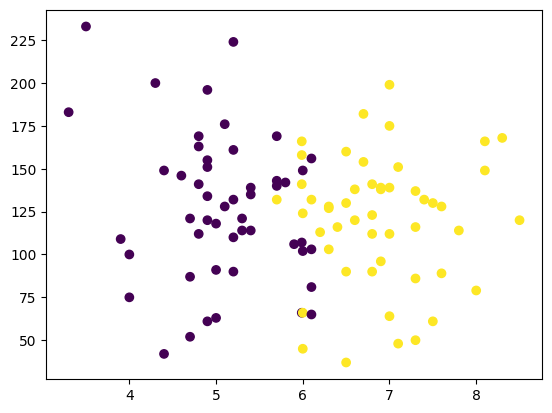

In [ ]:
#Replace Nan values wuth mean of the cgpa ##Only CGPA has Nan values
data['cgpa'] = data['cgpa'].fillna(data['cgpa'].mean())

# Replace 'Yes' with 1 and 'No' with 0
data['placement'] = data['placement'].map({'Yes': 1, 'No': 0})

# Plot
plt.scatter(data['cgpa'], data['iq'], c=data['placement'], cmap='viridis')

In [ ]:
IV = data.iloc[:,0:2]
DV = data.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(IV,DV,test_size=0.1)

**Scale**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaller = StandardScaler()

X_train = scaller.fit_transform(X_train)
X_test = scaller.transform(X_test)

In [ ]:
mean_cgpa, mean_iq = scaller.mean_
scale_cgpa, scale_iq = scaller.scale_

In [ ]:
# Training
from sklearn.linear_model import LogisticRegression



In [ ]:
clf = LogisticRegression()

In [ ]:
clf.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1])

In [ ]:
Y_test

,placement
50,0
24,0
32,1
52,1
38,1
88,0
79,1
53,1
48,1
33,0


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test,y_pred)*100

90.0

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

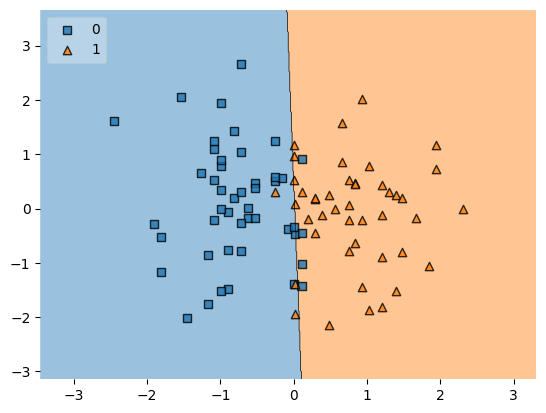

In [ ]:
plot_decision_regions(X_train,Y_train.values, clf=clf, legend=2)

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('model.pkl','wb'))
pickle.dump(scaller, open('scaler.pkl', 'wb'))


In [ ]:
def predict_placement(cgpa, iq):
    # Scale input
    input_data = np.array([[cgpa, iq]])
    input_scaled = scaller.transform(input_data)
    prediction = clf.predict(input_scaled)
    return 'Yes' if prediction[0] == 1 else 'No'

# Get user input
try:
    user_cgpa = float(input("Enter CGPA: "))
    user_iq = float(input("Enter IQ: "))
    result = predict_placement(user_cgpa, user_iq)
    print(f'Predicted Placement: {result}')
except ValueError:
    print("Invalid input. Please enter numeric values for CGPA and IQ.")

Enter CGPA: 3.9
Enter IQ: 80
Predicted Placement: No


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
